In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
train_data = pd.read_csv('../data/train_data.csv', index_col=0)


In [36]:
X_train = train_data.drop(columns=['Bankrupt?'])
y_train = train_data['Bankrupt?']

In [37]:
import matplotlib.pyplot as plt


# get shape of train data 
print("--- Train Data Info ---")
print(X_train.info())

# check for missing values
print("\n--- Missing Values in Train Data ---")
print(X_train.isnull().sum().sum())


--- Train Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 5807 entries, 0 to 5806
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 1    ROA(A) before interest and % after tax                   5807 non-null   float64
 2    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 3    Operating Gross Margin                                   5807 non-null   float64
 4    Realized Sales Gross Margin                              5807 non-null   float64
 5    Operating Profit Rate                                    5807 non-null   float64
 6    Pre-tax net Interest Rate                                5807 non-null   float64
 7    After-tax net Interest Rate                              5807 non-null   float64
 8  

We can see that there are 0 missing values in the dataset. We also see that majority of the features are floats and then Net Infcome Flag and Liability-Assets Flag are integers which suggest that they likely are categorical columns.

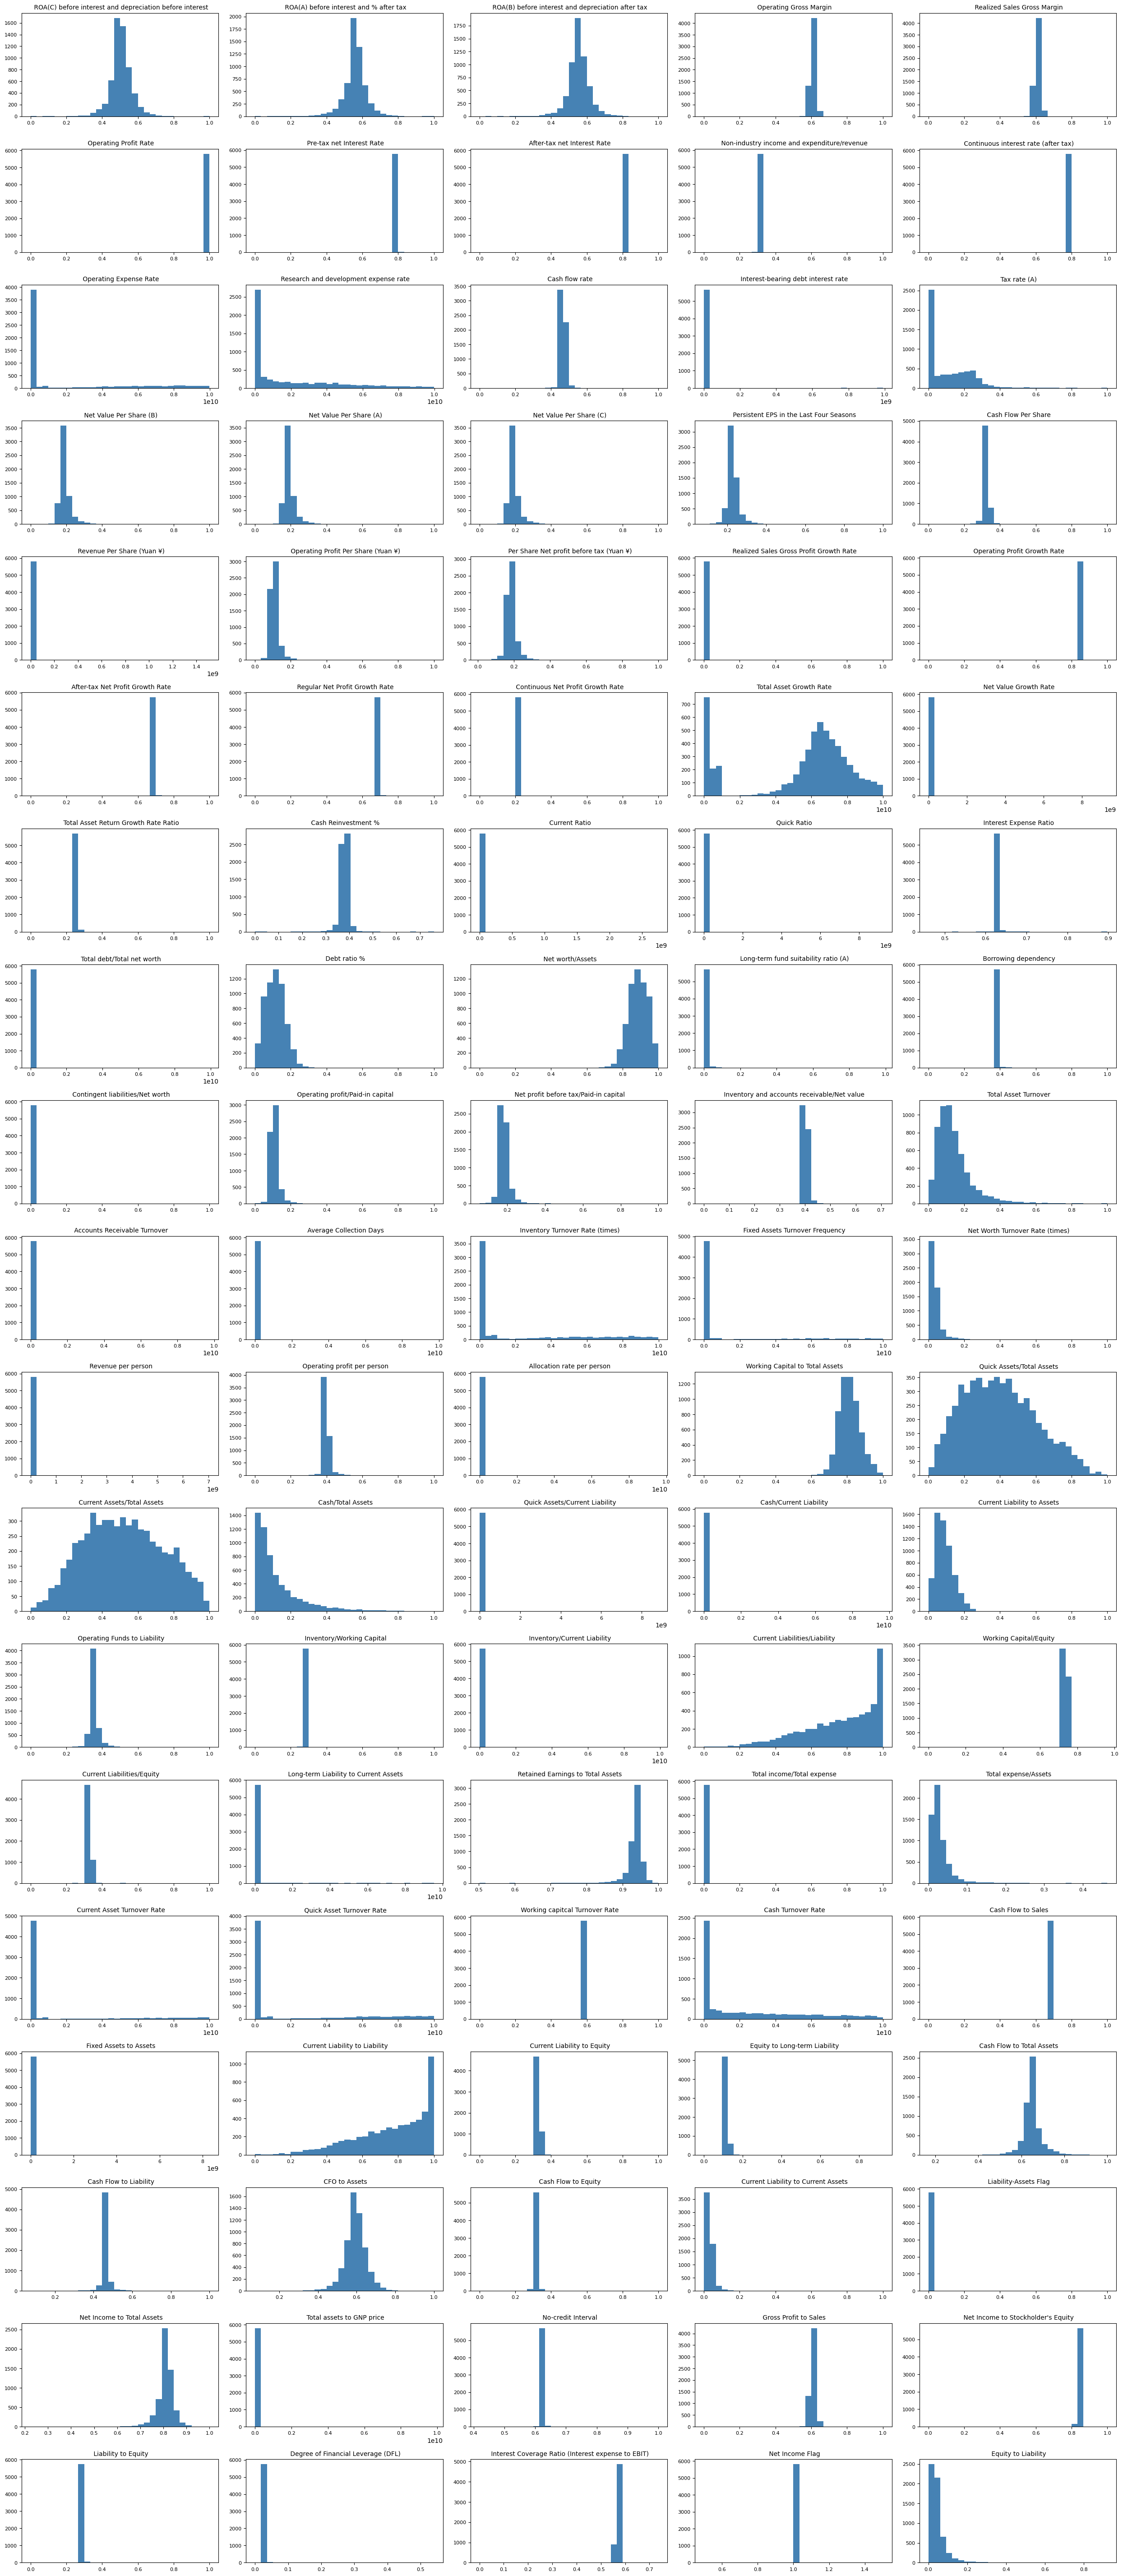

In [38]:
# plot distribtuion of numerical features
numerical_features = X_train.select_dtypes(include=['number']).columns
cols_per_grid = 5
rows = numerical_features.size // cols_per_grid + 1
fig, axes = plt.subplots(rows, cols_per_grid, figsize=(cols_per_grid*5, rows*3))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    axes[i].hist(X_train[col], bins=30, color='steelblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

We can see that a lot of these graphs have one large peak and nothing else. It's hard to interpret what that data actually is like. We see a couple of datasets that look normal so for those datasets, it is probably better to implement standard scaling.

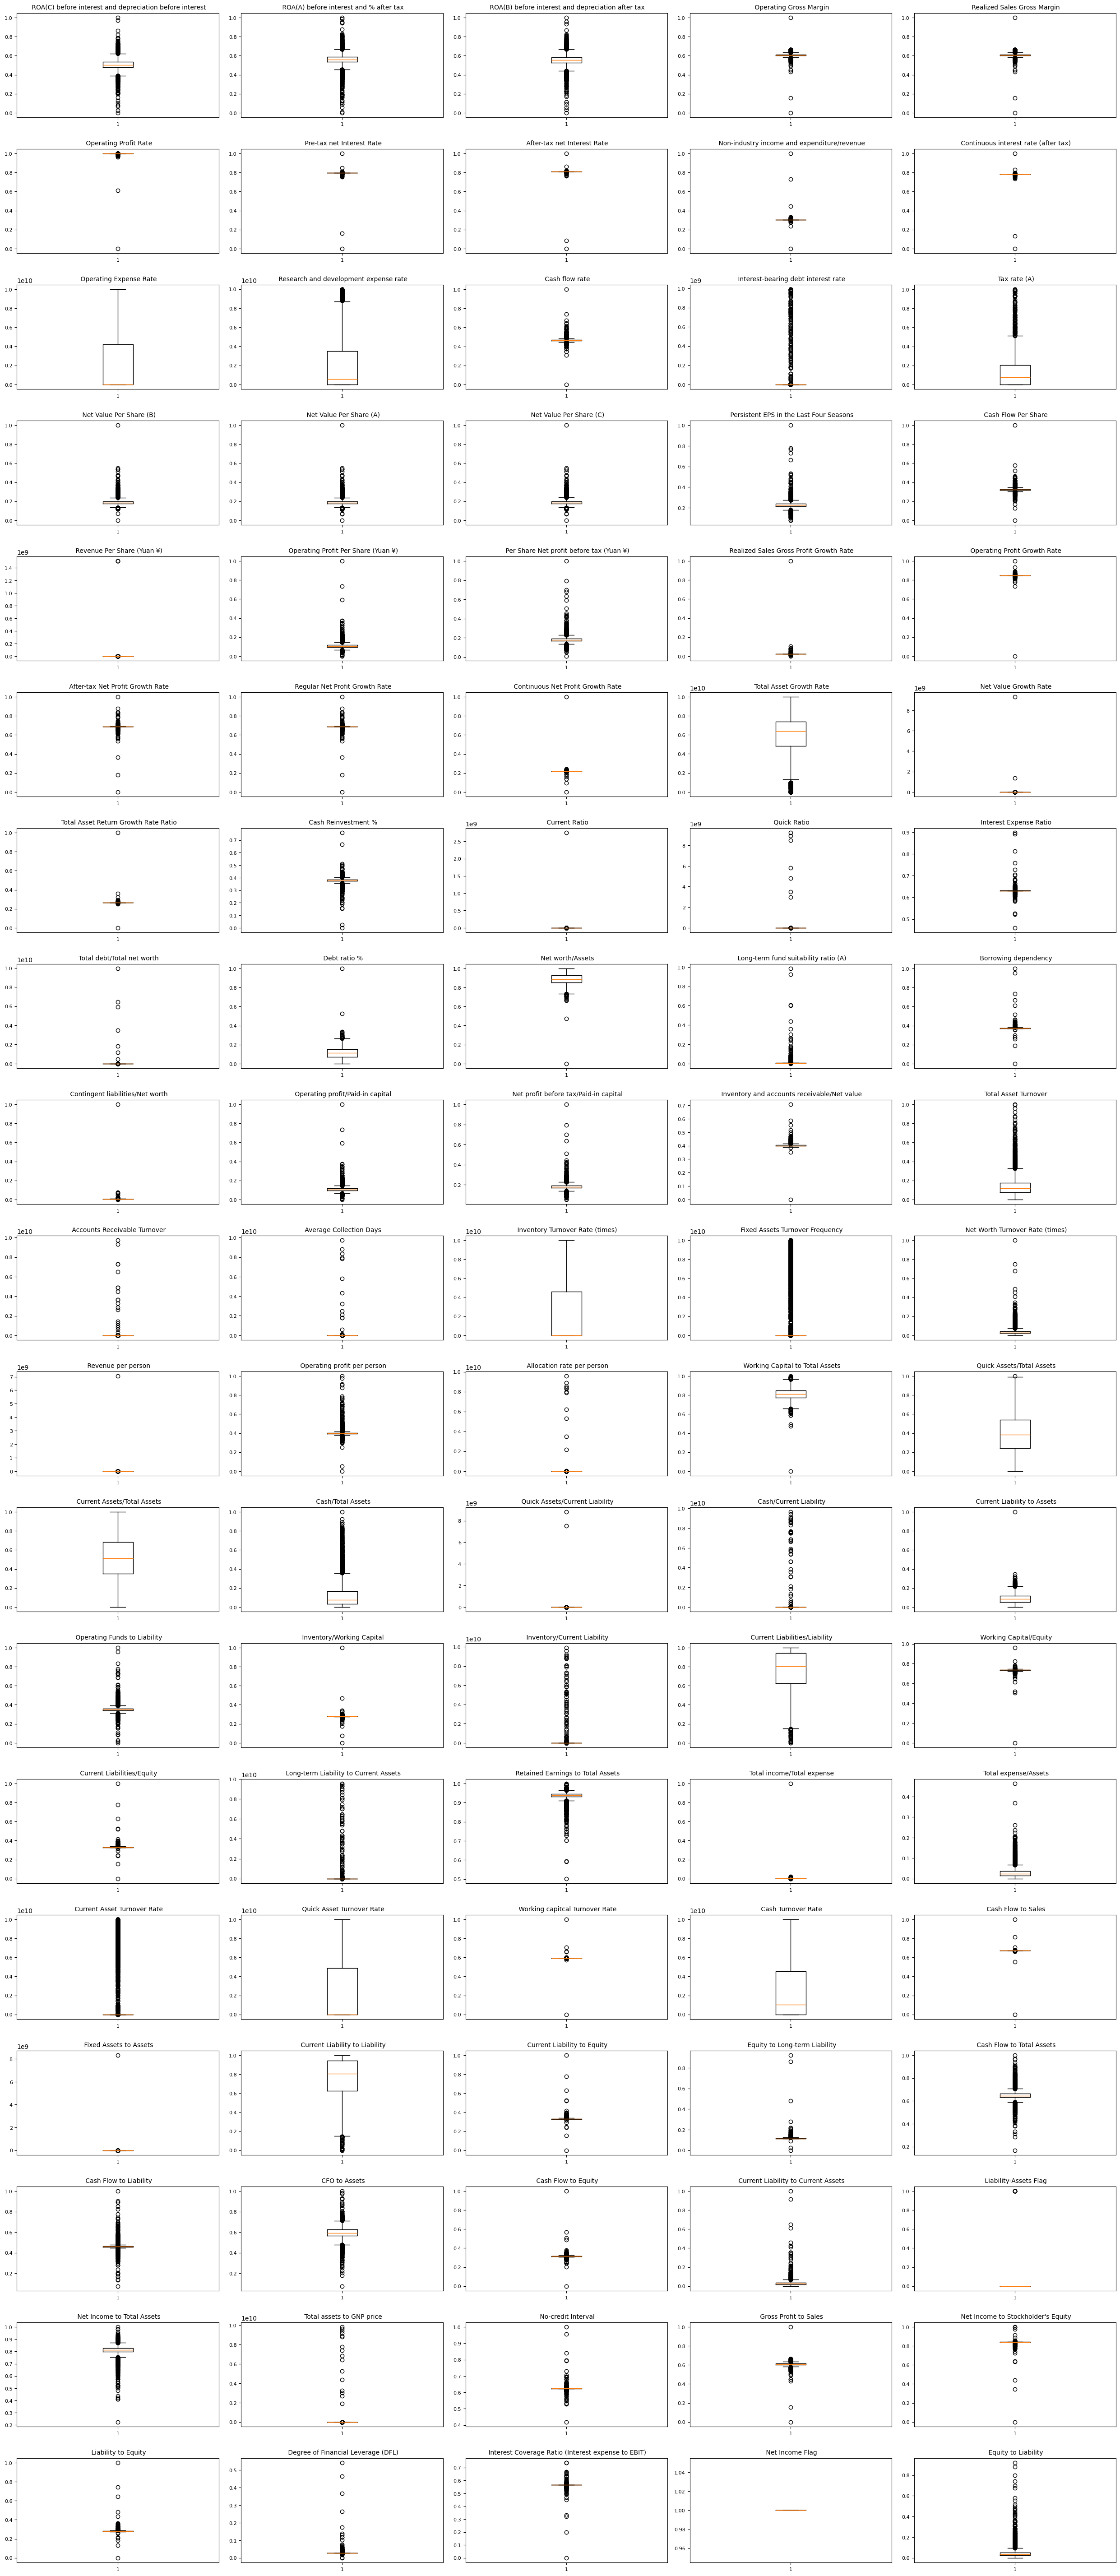

In [39]:
# plot distribtuion of numerical feature columns -> note how most are right skewed
numerical_features = X_train.select_dtypes(include=['number']).columns
cols_per_grid = 5
rows = numerical_features.size // cols_per_grid + 1
fig, axes = plt.subplots(rows, cols_per_grid, figsize=(cols_per_grid*5, rows*3))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    axes[i].boxplot(X_train[col])
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide any unused subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

For the case of this experiment, I do not think that it would be good to drop any outliers. For that reason, we will work with minMax scaling as in a lot of these cases, these outliers could be important for predicting bankruptcies.

### Transforming the Data

In [40]:
X_train.describe()

ROA(C) before interest and depreciation before interest  \
count                                        5807.000000          
mean                                            0.505416          
std                                             0.060808          
min                                             0.000000          
25%                                             0.476673          
50%                                             0.503096          
75%                                             0.535417          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              5807.000000   
mean                                  0.558893   
std                                   0.065650   
min                                   0.000000   
25%                                   0.535679   
50%                                   0.559911   
75%                                   0.589212   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        5807.000000    
mean                                            0.553852    
std                                             0.061613    
min                                             0.000000    
25%                                             0.527437    
50%                                             0.552492    
75%                                             0.583998    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              5807.000000                   5807.000000   
mean                  0.607958                      0.607938   
std                   0.017499                      0.017480   
min                   0.000000                      0.000000   
25%                   0.600448                      0.600427   
50%                   0.605969                      0.605933   
75%                   0.613856                      0.613730   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             5807.000000                 5807.000000   
mean                 0.998726                    0.797192   
std                  0.014087                    0.013731   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999094                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   5807.000000   
mean                       0.809081   
std                        0.014553   
min                        0.000000   
25%                        0.809312   
50%                        0.809376   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   5807.000000   
mean                                       0.303688   
std                                        0.011666   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            5807.000000  ...   
mean                                0.781369  ...   
std                                 0.013697  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781734  ...   
max 

In [41]:
X_train.corr().style.background_gradient(cmap='coolwarm')

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [42]:
X_train

ROA(C) before interest and depreciation before interest  \
Index                                                             
0                                               0.450397          
1                                               0.530005          
2                                               0.571150          
3                                               0.483401          
4                                               0.510359          
...                                                  ...          
5802                                            0.507483          
5803                                            0.553795          
5804                                            0.491639          
5805                                            0.513626          
5806                                            0.537805          

        ROA(A) before interest and % after tax  \
Index                                            
0                                     0.504034   
1                                     0.572885   
2                                     0.620148   
3                                     0.556694   
4                                     0.537287   
...                                        ...   
5802                                  0.547263   
5803                                  0.636993   
5804                                  0.559693   
5805                                  0.573321   
5806                                  0.597253   

        ROA(B) before interest and depreciation after tax  \
Index                                                       
0                                               0.506986    
1                                               0.574763    
2                                               0.624177    
3                                               0.536164    
4                                               0.552546    
...                                                  ...    
5802                                            0.553188    
5803                                            0.606671    
5804                                            0.541250    
5805                                            0.555758    
5806                                            0.582205    

        Operating Gross Margin   Realized Sales Gross Margin  \
Index                                                          
0                     0.594640                      0.594640   
1                     0.605695                      0.605558   
2                     0.612275                      0.612282   
3                     0.602445                      0.602445   
4                     0.600023                      0.600023   
...                        ...                           ...   
5802                  0.596448                      0.596448   
5803                  0.648323                      0.648323   
5804                  0.597003                      0.597003   
5805                  0.646665                      0.646665   
5806                  0.635178                      0.635221   

        Operating Profit Rate   Pre-tax net Interest Rate  \
Index                                                       
0                    0.998906                    0.797293   
1                    0.999058                    0.797512   
2                    0.999163                    0.797654   
3                    0.999035                    0.797458   
4                    0.999009                    0.797406   
...                       ...                         ...   
5802                 0.998991                    0.797393   
5803                 0.999388                    0.798010   
5804                 0.998981                    0.797405   
5805                 0.999066                    0.797506   
5806                 0.999249                    0.797785   

        After-tax net Interest Rate  \
Index                    

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
X_const = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data.sort_values(by="VIF Factor", ascending=False, inplace=True)
vif_data = vif_data[vif_data["VIF Factor"] < 10]
print(f"New Feature Length: {len(vif_data)}")

New Feature Length: 54


c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


We managed to get our new feature length down from 95 total features to 54 features based on the variance inflation factor. However, I think it is possible for it to go down even more. I think any VIF over 5 should be removed from our dataset.

In [44]:
vif_data = vif_data[vif_data["VIF Factor"] < 5]
print(f"New Feature Length: {len(vif_data)}")

New Feature Length: 48


We narrowed that list down to 48 total features with not too much correlation

In [45]:
vif_data.reset_index(drop=True, inplace=True)
X_train = X_train[vif_data["feature"]]
X_train_copy = X_train.copy()

Since we are already narrowed down to 50 total features. The next item on our list is testing significance for each of these factors using Ordinary Least quares. I implementned the statsmodel api for this example.

In [46]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train_copy)
ols_model = sm.OLS(y_train, X_train_const).fit()
p_values = ols_model.pvalues
p_values = p_values[p_values < 0.05]
print(f"New Feature Length: {len(p_values)}")

New Feature Length: 19


In [47]:
X_train = X_train[p_values.index]
X_train.head()

Cash Flow to Equity   Retained Earnings to Total Assets  \
Index                                                             
0                  0.318116                            0.927051   
1                  0.316348                            0.950852   
2                  0.321974                            0.947982   
3                  0.318516                            0.933711   
4                  0.310454                            0.933202   

        Revenue per person   Current Liability to Current Assets  \
Index                                                              
0                 0.015463                              0.029919   
1                 0.021547                              0.025790   
2                 0.017637                              0.018529   
3                 0.062647                              0.034617   
4                 0.095416                              0.031509   

        Equity to Liability   Cash/Total Assets   Total expense/Assets  \
Index                                                                    
0                  0.032464            0.069738               0.017202   
1                  0.032442            0.064894               0.018523   
2                  0.033034            0.144190               0.018363   
3                  0.015406            0.049628               0.010379   
4                  0.028858            0.275644               0.034975   

        Liability-Assets Flag   Total debt/Total net worth  \
Index                                                        
0                           0                     0.005869   
1                           0                     0.005875   
2                           0                     0.005719   
3                           0                     0.025663   
4                           0                     0.007032   

        Operating profit per person   Quick Assets/Current Liability  \
Index                                                                  
0                          0.389091                         0.005650   
1                          0.398928                         0.008670   
2                          0.403790                         0.013076   
3                          0.407544                         0.000557   
4                          0.407397                         0.008962   

        Current Ratio   Tax rate (A)   Fixed Assets to Assets  \
Index                                                           
0            0.009750       0.000000                 0.457497   
1            0.011342       0.259439                 0.265440   
2            0.015831       0.104464                 0.276147   
3            0.008397       0.000000                 0.057978   
4            0.009247       0.732058                 0.065429   

        Fixed Assets Turnover Frequency   Operating Expense Rate  \
Index                                                              
0                              0.000163             8.010000e+09   
1                              0.000286             1.024540e-04   
2                              0.000249             1.059230e-04   
3                              0.000782             7.530000e+09   
4                              0.002158             6.270000e+09   

        Cash Turnover Rate   Cash/Current Liability   Net Income Flag  
Index                                                                  
0             5.450000e+09                 0.007310                 1  
1             4.450000e+09                 0.003394                 1  
2             1.345160e-04                 0.011949                 1  
3             6.160000e+09                 0.001372                 1  
4             9.810000e+08                 0.011760                 1

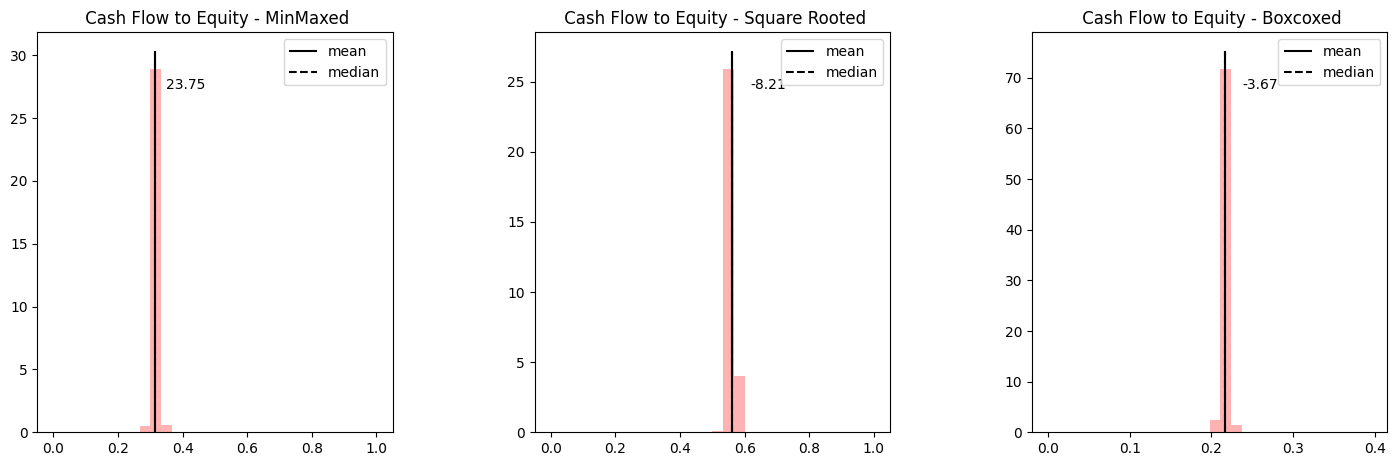

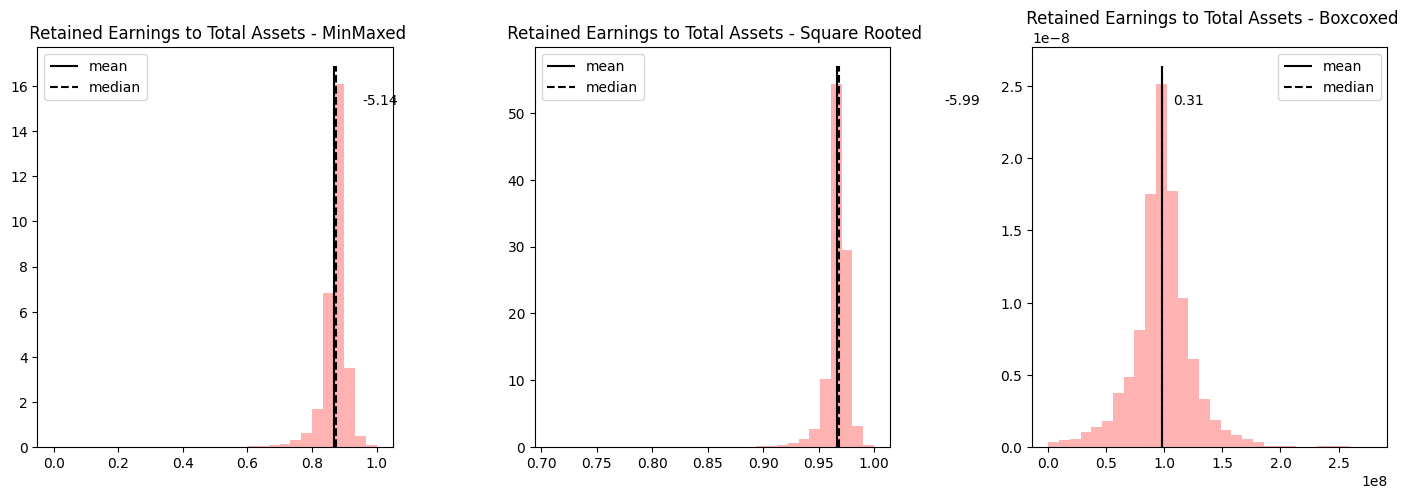

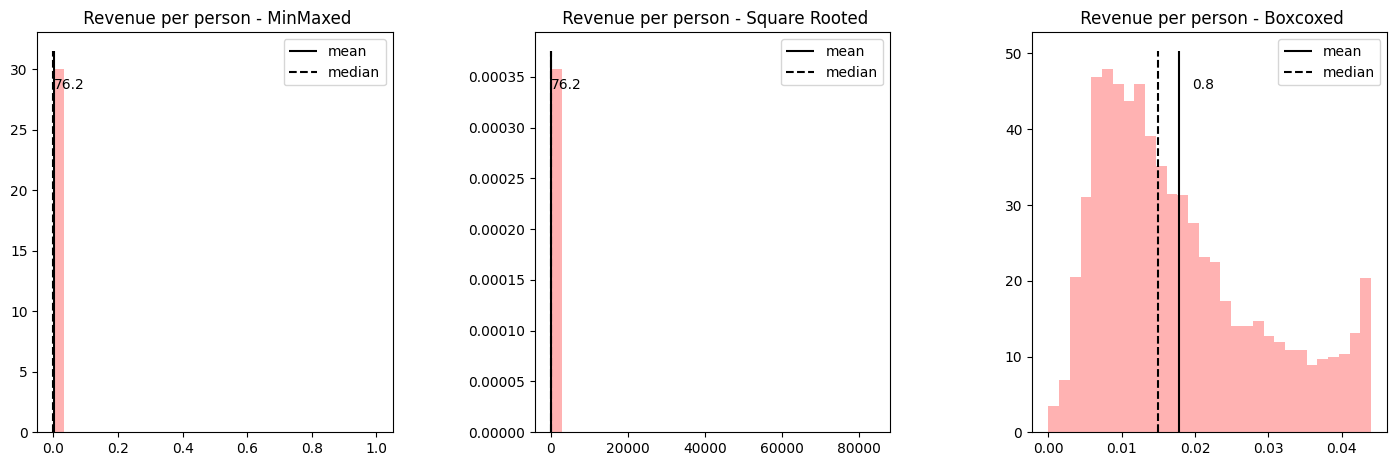

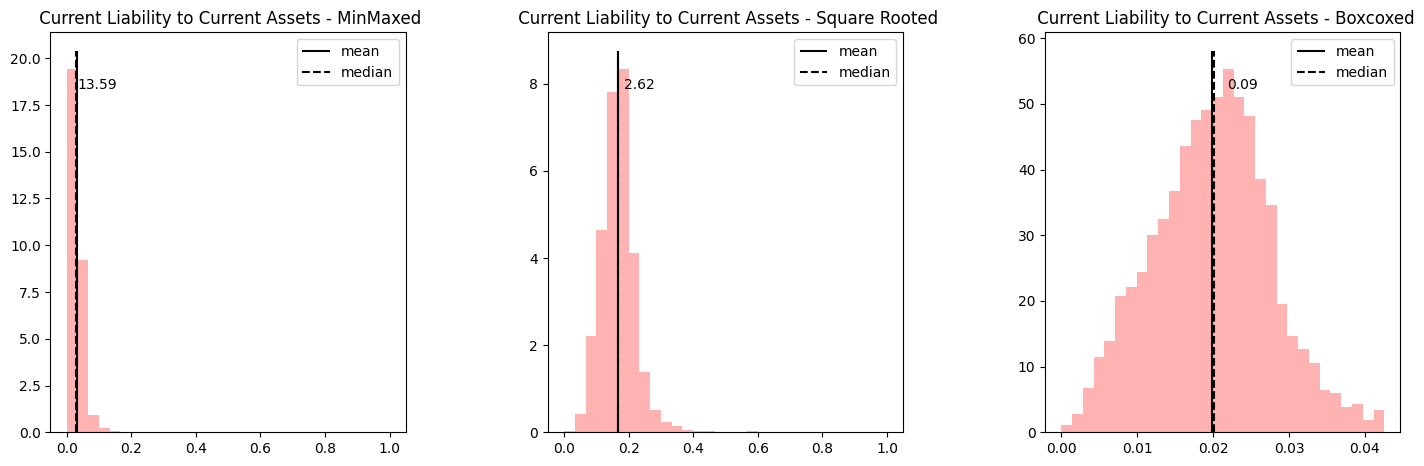

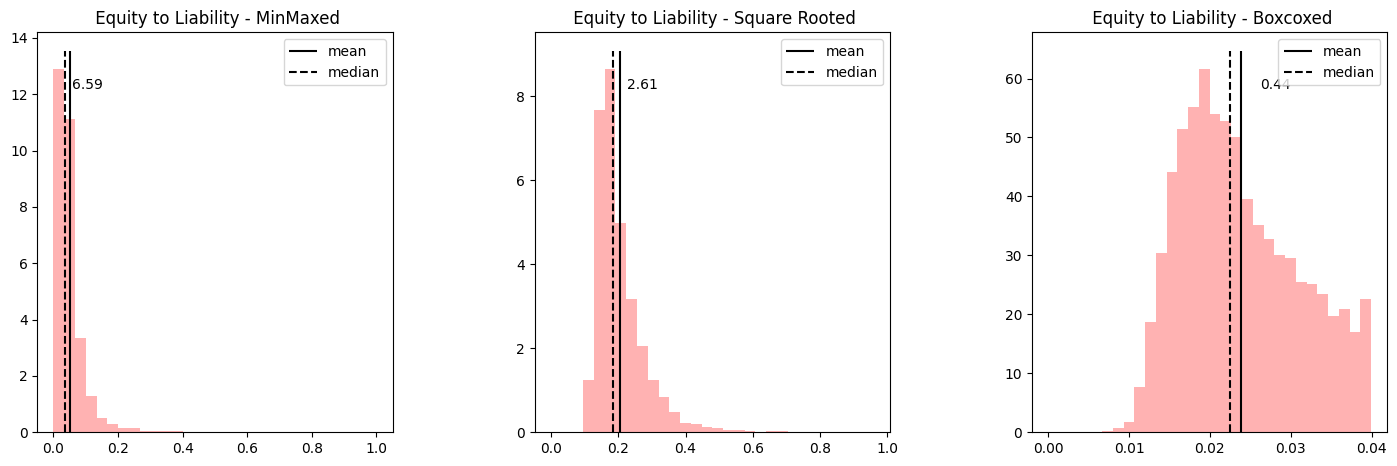

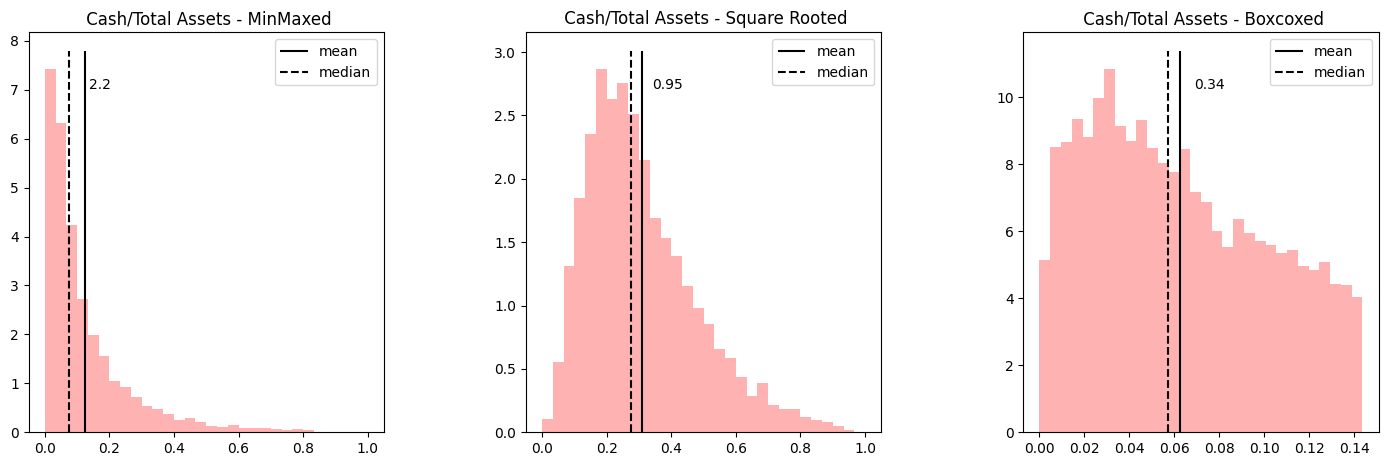

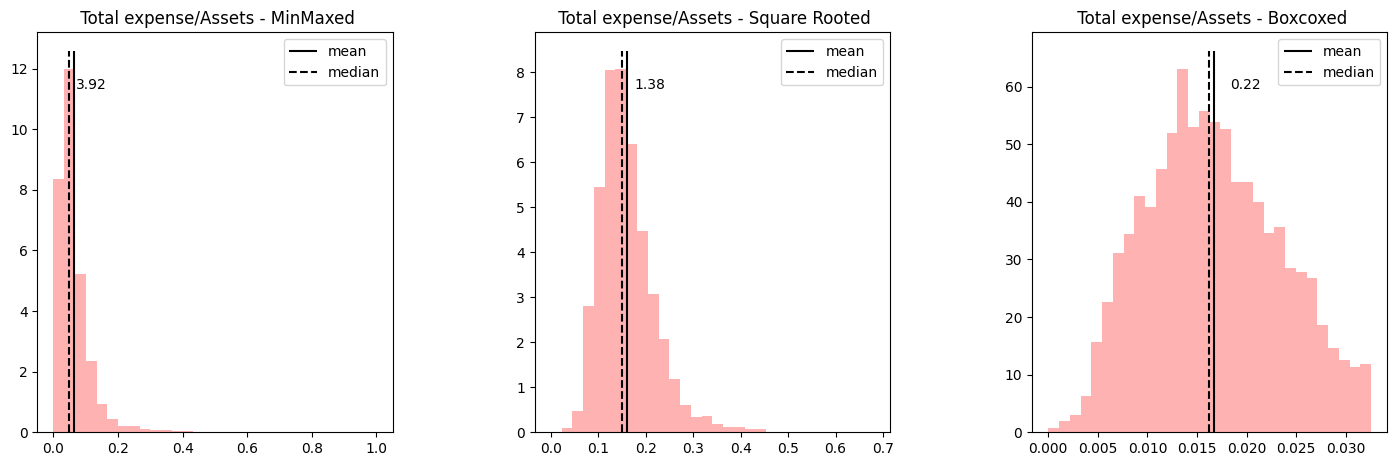

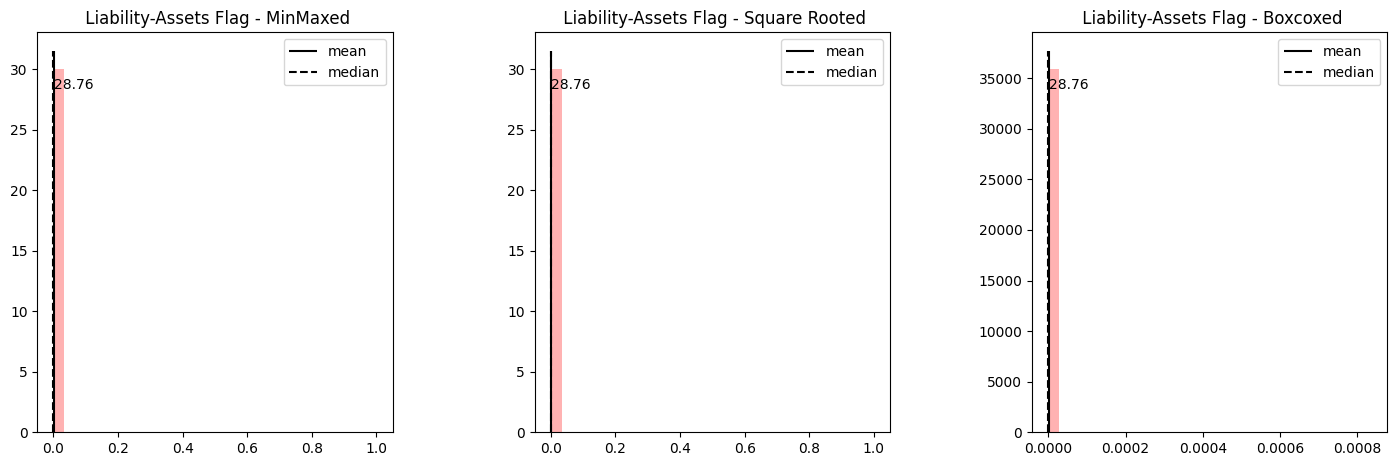

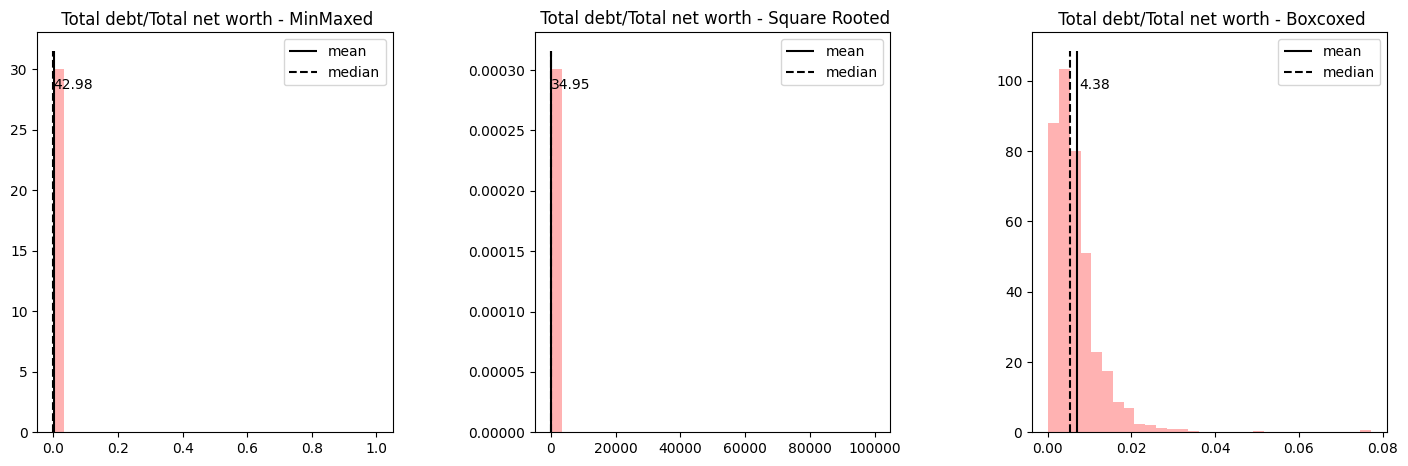

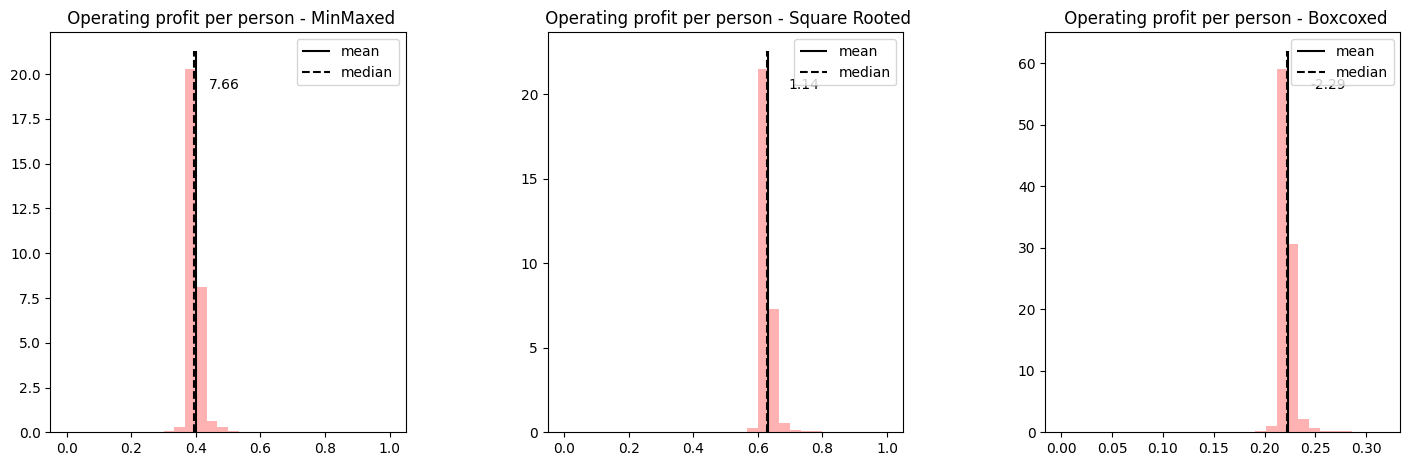

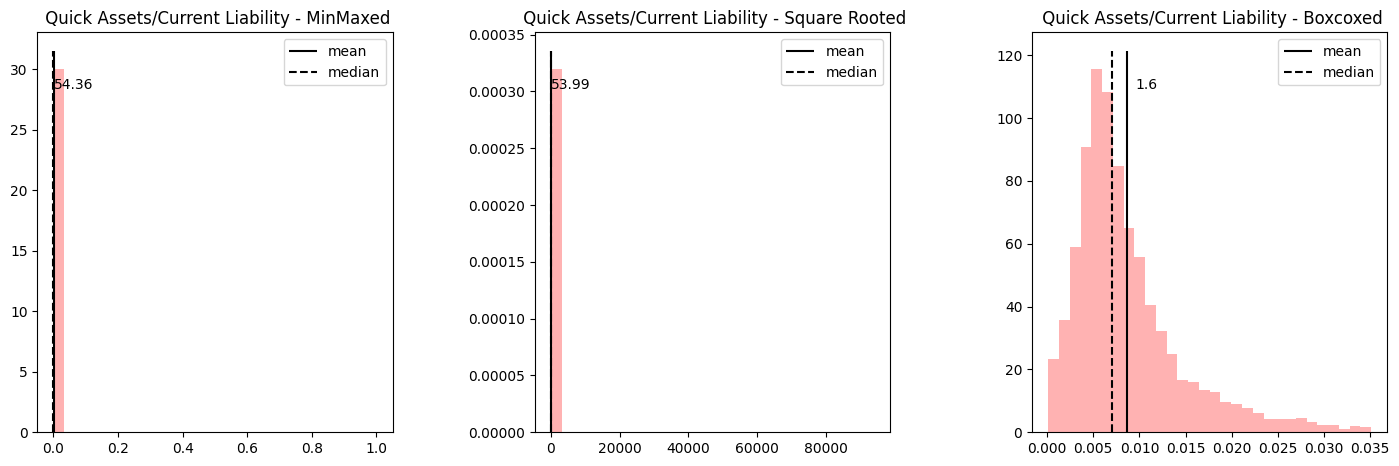

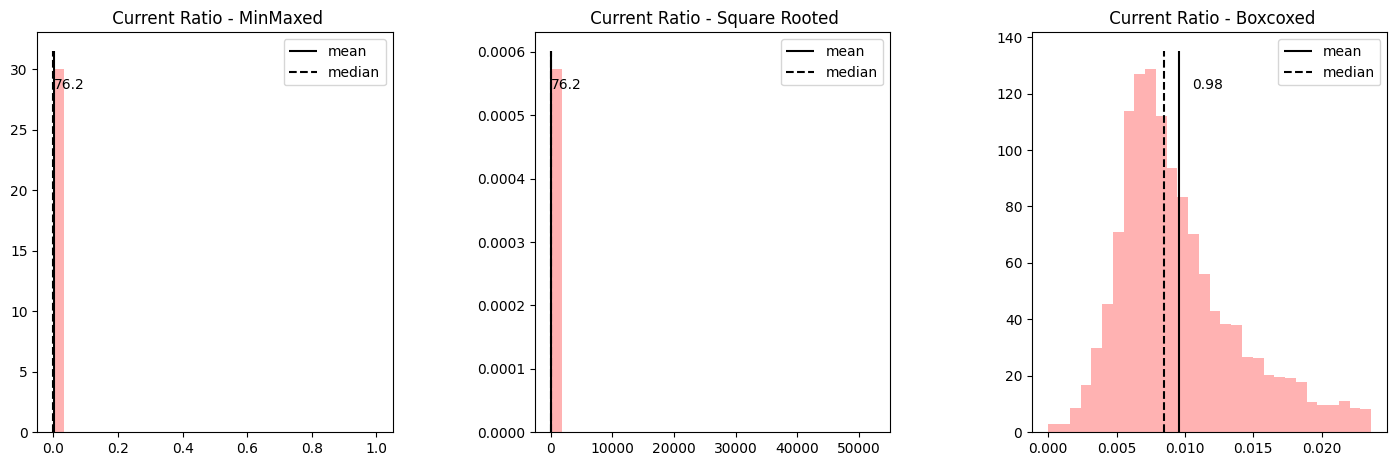

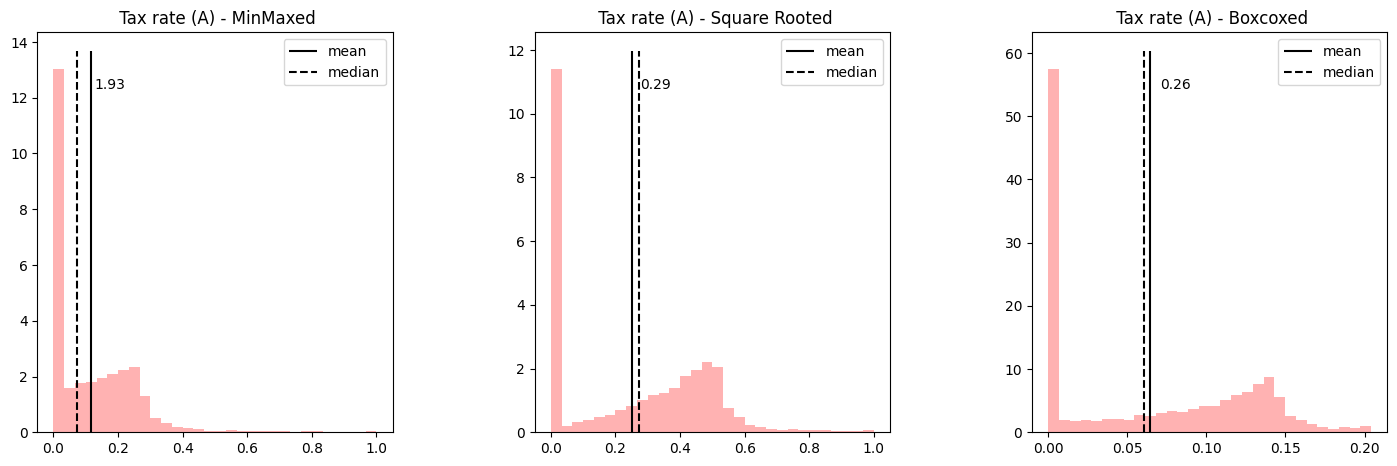

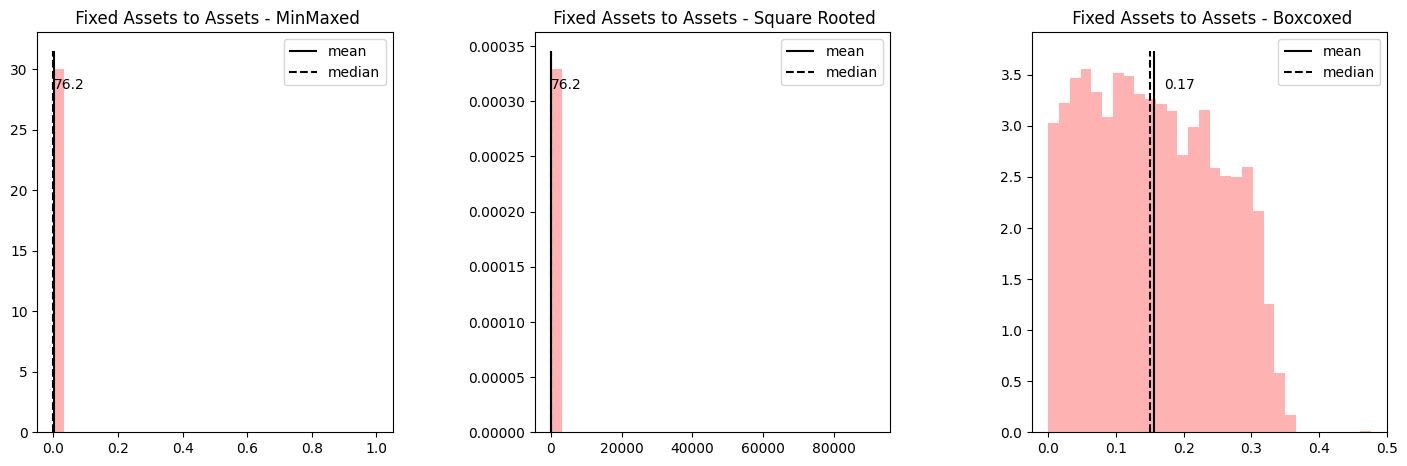

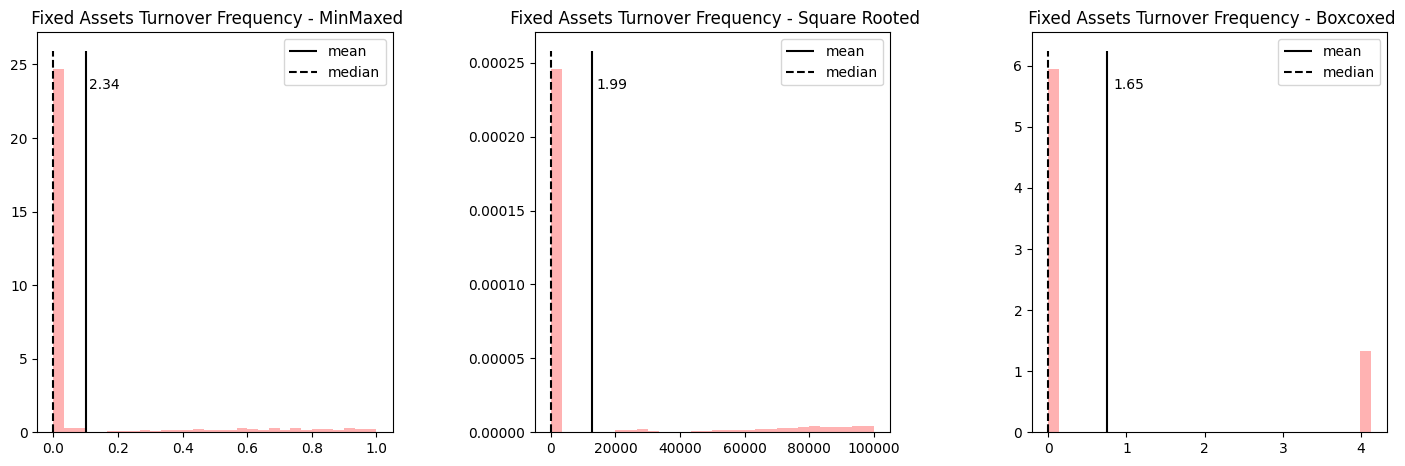

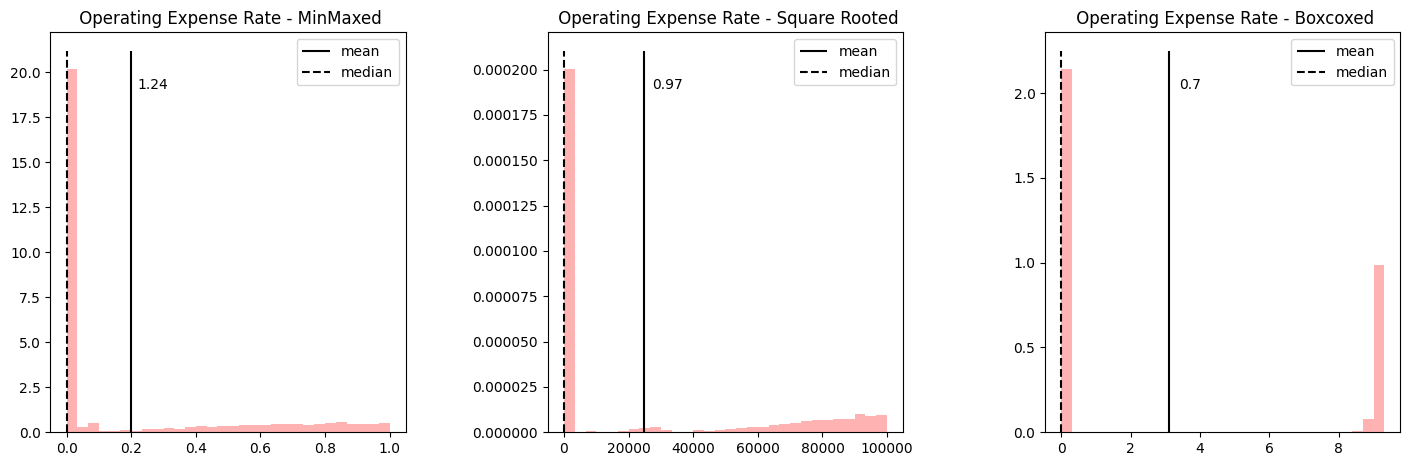

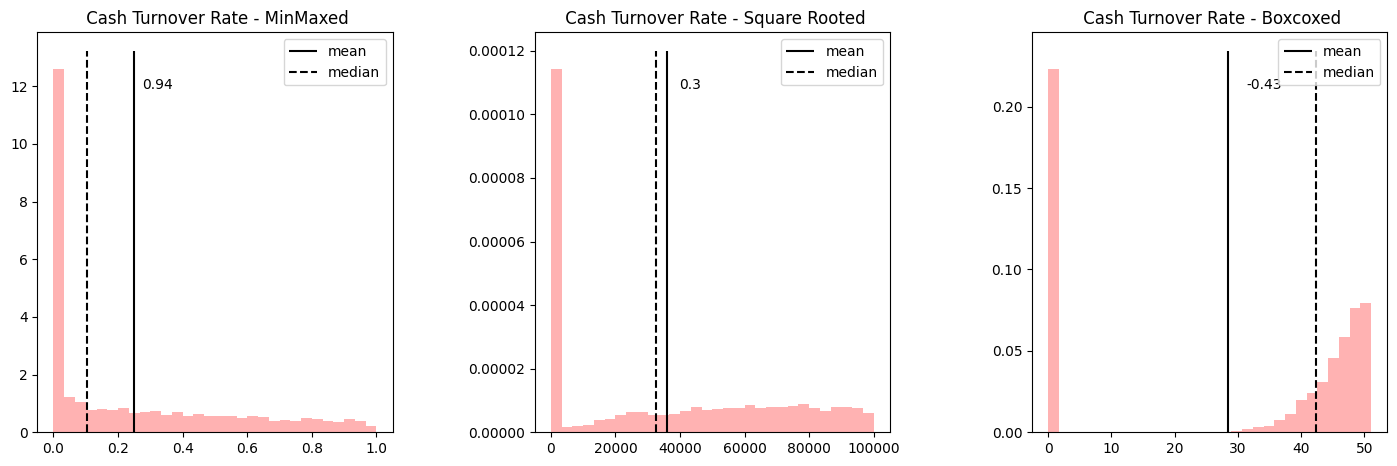

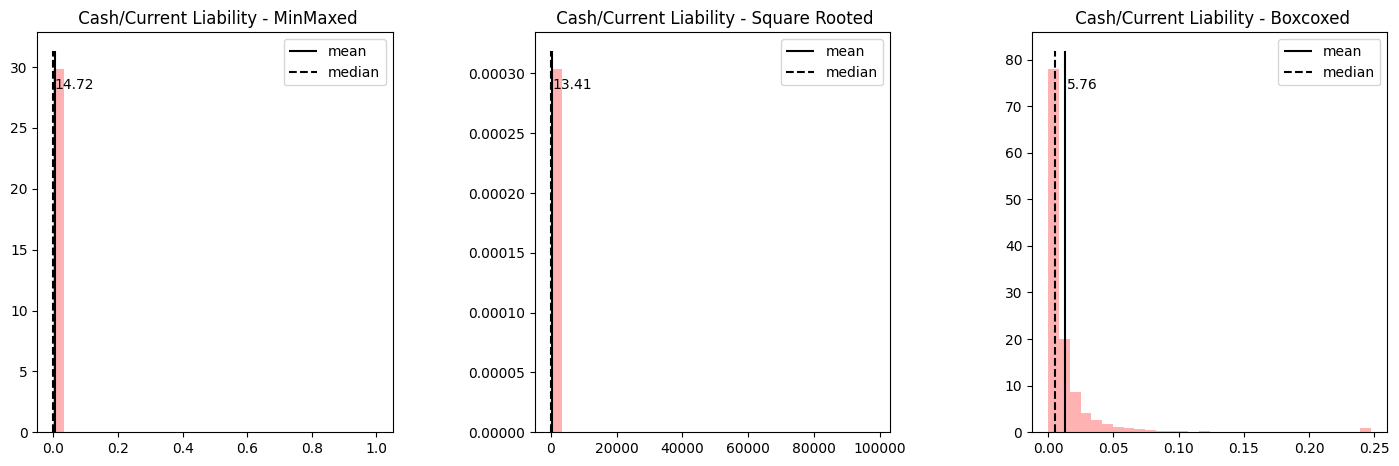

Error processing column  Net Income Flag.


In [48]:
import scipy.stats as stats
for column in X_train.columns:
    try:
        X = X_train[column]
        random2 = (X - X.min()) / (X.max() - X.min())
        random3 = np.sqrt(X)
        random4, _ = stats.boxcox(X + 1)  # Adding 1 to avoid issues with zero values
        random5 = np.log(X + 1)  # Adding 1 to avoid issues with zero values
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        for ax, random, rd in zip([ax1, ax2, ax3], [random2, random3, random4], ['MinMaxed', 'Square Rooted', 'Boxcoxed',]):
            ax.hist(random, 30, density=True, color='red', alpha=0.3)
            y_min, y_max = ax.get_ylim()
            ax.vlines(np.mean(random), y_min, y_max, color='black', label='mean')
            ax.vlines(np.median(random), y_min, y_max, color='black', linestyle='--', label='median')
            ax.text(np.mean(random) * 1.1, y_max * 0.90, round(pd.Series(random).skew(), 2), ha='left')
            ax.legend(loc='best')
            ax.set_title(f'{column} - {rd}')
        
        plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=0.9, wspace=0.4, hspace=0.4)
        plt.show()
    except:
        print(f"Error processing column {column}.")



We see in all of these cases, the box cox transformation rescales the data a lot better than the min max method and the square root methhod. We see that this is the case in all scenarios. 

In [49]:
X_train.columns

Index([' Cash Flow to Equity', ' Retained Earnings to Total Assets',
       ' Revenue per person', ' Current Liability to Current Assets',
       ' Equity to Liability', ' Cash/Total Assets', ' Total expense/Assets',
       ' Liability-Assets Flag', ' Total debt/Total net worth',
       ' Operating profit per person', ' Quick Assets/Current Liability',
       ' Current Ratio', ' Tax rate (A)', ' Fixed Assets to Assets',
       ' Fixed Assets Turnover Frequency', ' Operating Expense Rate',
       ' Cash Turnover Rate', ' Cash/Current Liability', ' Net Income Flag'],
      dtype='object')

In [50]:
X_train_copy = X_train.copy()
X_train_copy.head()

Cash Flow to Equity   Retained Earnings to Total Assets  \
Index                                                             
0                  0.318116                            0.927051   
1                  0.316348                            0.950852   
2                  0.321974                            0.947982   
3                  0.318516                            0.933711   
4                  0.310454                            0.933202   

        Revenue per person   Current Liability to Current Assets  \
Index                                                              
0                 0.015463                              0.029919   
1                 0.021547                              0.025790   
2                 0.017637                              0.018529   
3                 0.062647                              0.034617   
4                 0.095416                              0.031509   

        Equity to Liability   Cash/Total Assets   Total expense/Assets  \
Index                                                                    
0                  0.032464            0.069738               0.017202   
1                  0.032442            0.064894               0.018523   
2                  0.033034            0.144190               0.018363   
3                  0.015406            0.049628               0.010379   
4                  0.028858            0.275644               0.034975   

        Liability-Assets Flag   Total debt/Total net worth  \
Index                                                        
0                           0                     0.005869   
1                           0                     0.005875   
2                           0                     0.005719   
3                           0                     0.025663   
4                           0                     0.007032   

        Operating profit per person   Quick Assets/Current Liability  \
Index                                                                  
0                          0.389091                         0.005650   
1                          0.398928                         0.008670   
2                          0.403790                         0.013076   
3                          0.407544                         0.000557   
4                          0.407397                         0.008962   

        Current Ratio   Tax rate (A)   Fixed Assets to Assets  \
Index                                                           
0            0.009750       0.000000                 0.457497   
1            0.011342       0.259439                 0.265440   
2            0.015831       0.104464                 0.276147   
3            0.008397       0.000000                 0.057978   
4            0.009247       0.732058                 0.065429   

        Fixed Assets Turnover Frequency   Operating Expense Rate  \
Index                                                              
0                              0.000163             8.010000e+09   
1                              0.000286             1.024540e-04   
2                              0.000249             1.059230e-04   
3                              0.000782             7.530000e+09   
4                              0.002158             6.270000e+09   

        Cash Turnover Rate   Cash/Current Liability   Net Income Flag  
Index                                                                  
0             5.450000e+09                 0.007310                 1  
1             4.450000e+09                 0.003394                 1  
2             1.345160e-04                 0.011949                 1  
3             6.160000e+09                 0.001372                 1  
4             9.810000e+08                 0.011760                 1

In [51]:
for column in X_train_copy.columns:
    try:
        # applying boxcox transformation to the column
        # Adding 1 to avoid issues with zero values
        # was going to include this but am not going to and column != " Retained Earnings to Total Assets"
        if X_train_copy[column].min() <= 0 :
            X_train_copy[column], _ = stats.boxcox(X_train_copy[column] + 1)
        else:
            X_train_copy[column], _ = stats.boxcox(X_train_copy[column])
    except:
        print(f"Error processing column {column}.")

Error processing column  Net Income Flag.


In [52]:
X_train_copy.head()

Cash Flow to Equity   Retained Earnings to Total Assets  \
Index                                                             
0                  0.217546                           -0.043381   
1                  0.216729                           -0.034301   
2                  0.219318                           -0.035592   
3                  0.217730                           -0.041187   
4                  0.213984                           -0.041363   

        Revenue per person   Current Liability to Current Assets  \
Index                                                              
0                 0.012956                              0.021269   
1                 0.016897                              0.019162   
2                 0.014429                              0.014912   
3                 0.032948                              0.023429   
4                 0.038464                              0.022027   

        Equity to Liability   Cash/Total Assets   Total expense/Assets  \
Index                                                                    
0                  0.021996            0.053904               0.013277   
1                  0.021986            0.051009               0.014031   
2                  0.022242            0.087701               0.013941   
3                  0.012704            0.041171               0.008849   
4                  0.020352            0.117889               0.021234   

        Liability-Assets Flag   Total debt/Total net worth  \
Index                                                        
0                         0.0                    -7.700719   
1                         0.0                    -7.698724   
2                         0.0                    -7.756428   
3                         0.0                    -4.863509   
4                         0.0                    -7.318907   

        Operating profit per person   Quick Assets/Current Liability  \
Index                                                                  
0                          0.219656                        -6.739270   
1                          0.222590                        -6.043436   
2                          0.224013                        -5.402496   
3                          0.225099                       -11.054388   
4                          0.225056                        -5.990816   

        Current Ratio   Tax rate (A)   Fixed Assets to Assets  \
Index                                                           
0            0.007958       0.000000                 0.260497   
1            0.008968       0.140670                 0.185825   
2            0.011474       0.079348                 0.190924   
3            0.007043       0.000000                 0.053158   
4            0.007624       0.196328                 0.059349   

        Fixed Assets Turnover Frequency   Operating Expense Rate  \
Index                                                              
0                              0.000163                 9.293653   
1                              0.000286                 0.000102   
2                              0.000249                 0.000106   
3                              0.000782                 9.286611   
4                              0.002155                 9.265499   

        Cash Turnover Rate   Cash/Current Liability   Net Income Flag  
Index                                                                  
0                48.603120                 0.007177                 1  
1                47.794965                 0.003365                 1  
2                 0.000135                 0.011598                 1  
3                49.096282                 0.001368                 1  
4                42.076560                 0.011420                 1

We did not add 1 to the second column of our dataset as that gave us extremely large values which would negatively affect our principal component analysis.

### We can maybe minimize our dimensionality using Principal component analysis.

In [53]:
def principal_component_analysis(X, n_components=2):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X)
    return principal_components, pca.explained_variance_ratio_

In [54]:
principal_components, explained_variance = principal_component_analysis(X_train_copy, n_components=10)

In [55]:
explained_variance

array([9.50710818e-01, 3.44725892e-02, 8.30848714e-03, 4.66635766e-03,
       1.82166198e-03, 1.07218935e-05, 6.60129322e-06, 1.31890317e-06,
       1.01961067e-06, 1.53201226e-07])

### Now that we have our new training data with a smaller amount of features that were all transformed using the box-cox transformation, we can now convert all of our subgroups into clusters. 

In [56]:
def myKmeans(X, k, max_iter):
    X = X.values
    #initializing randomg variables
    labels = np.random.randint(0, k, size=X.shape[0])
    centroids = np.zeros((k, X.shape[1]))
    for x in range(max_iter):
        # computing each cluster's new centroid
        for j in range(k):
            points = X[labels == j]
            if len(points) > 0:
                centroids[j] = np.mean(points, axis=0)
            else:
                centroids[j]  = X[np.random.randint(0, X.shape[0])]
        # assigning each observation to the cluster whose centroid is closest
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        new_labels = np.argmin(distances, axis=1)
        # checking for convergence of all values in labels array
        if (labels == new_labels).all():
            break
        labels = new_labels
    #calculating inertia
    for i in range(X.shape[0]):
        distances[i] = np.linalg.norm(X[i] - centroids[labels[i]])**2
    inertia = sum(np.sum((X[labels == i] - centroids[i])**2) for i in range(k))

    return labels, centroids, inertia

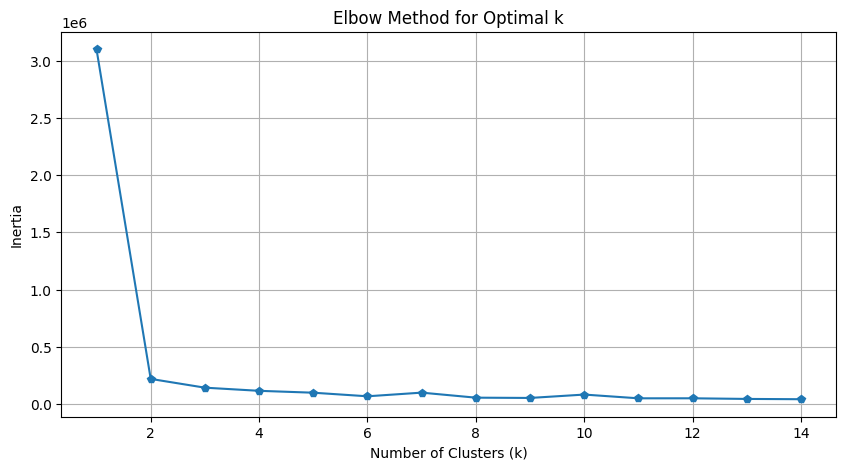

In [57]:
np.random.seed(122)
#setting a random seed to get consistent elbow plot results
import matplotlib.pyplot as plt
k_values = range(1, 15)
inertias = []
for k in k_values:
    labels, centroids, inertia = myKmeans(X_train_copy, k, 100)
    inertias.append(inertia)
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, marker='p')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

The elbow method shows us that 2 clusters is optimal. We will end up just using 4 clusters for our example

In [58]:
from sklearn.cluster import KMeans
# Perform K-Means clustering with 8 Clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_copy)
X_train_copy['Cluster'] = kmeans.labels_

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
train_data = pd.concat([X_train_copy, y_train], axis=1)
train_data.head()

Cash Flow to Equity   Retained Earnings to Total Assets  \
Index                                                             
0                  0.217546                           -0.043381   
1                  0.216729                           -0.034301   
2                  0.219318                           -0.035592   
3                  0.217730                           -0.041187   
4                  0.213984                           -0.041363   

        Revenue per person   Current Liability to Current Assets  \
Index                                                              
0                 0.012956                              0.021269   
1                 0.016897                              0.019162   
2                 0.014429                              0.014912   
3                 0.032948                              0.023429   
4                 0.038464                              0.022027   

        Equity to Liability   Cash/Total Assets   Total expense/Assets  \
Index                                                                    
0                  0.021996            0.053904               0.013277   
1                  0.021986            0.051009               0.014031   
2                  0.022242            0.087701               0.013941   
3                  0.012704            0.041171               0.008849   
4                  0.020352            0.117889               0.021234   

        Liability-Assets Flag   Total debt/Total net worth  \
Index                                                        
0                         0.0                    -7.700719   
1                         0.0                    -7.698724   
2                         0.0                    -7.756428   
3                         0.0                    -4.863509   
4                         0.0                    -7.318907   

        Operating profit per person  ...   Current Ratio   Tax rate (A)  \
Index                                ...                                  
0                          0.219656  ...        0.007958       0.000000   
1                          0.222590  ...        0.008968       0.140670   
2                          0.224013  ...        0.011474       0.079348   
3                          0.225099  ...        0.007043       0.000000   
4                          0.225056  ...        0.007624       0.196328   

        Fixed Assets to Assets   Fixed Assets Turnover Frequency  \
Index                                                              
0                     0.260497                          0.000163   
1                     0.185825                          0.000286   
2                     0.190924                          0.000249   
3                     0.053158                          0.000782   
4                     0.059349                          0.002155   

        Operating Expense Rate   Cash Turnover Rate   Cash/Current Liability  \
Index                                                                          
0                     9.293653            48.603120                 0.007177   
1                     0.000102            47.794965                 0.003365   
2                     0.000106             0.000135                 0.011598   
3                     9.286611            49.096282                 0.001368   
4                     9.265499            42.076560                 0.011420   

        Net Income Flag  Cluster  Bankrupt?  
Index                                        
0                     1        2          0  
1                     1        0          0  
2                     1        1          0  
3                     1        2          0  
4                     1        2          0  

[5 rows x 21 columns]

Number of Companies in Cluster 2: 1485
Number of Bankrupted Companies in Cluster 2: 56
Proportion of Bankrupted Companies in Cluster 2: 0.04
Number of Companies in Cluster 0: 2118
Number of Bankrupted Companies in Cluster 0: 111
Proportion of Bankrupted Companies in Cluster 0: 0.05
Number of Companies in Cluster 1: 1742
Number of Bankrupted Companies in Cluster 1: 26
Proportion of Bankrupted Companies in Cluster 1: 0.01
Number of Companies in Cluster 3: 462
Number of Bankrupted Companies in Cluster 3: 5
Proportion of Bankrupted Companies in Cluster 3: 0.01


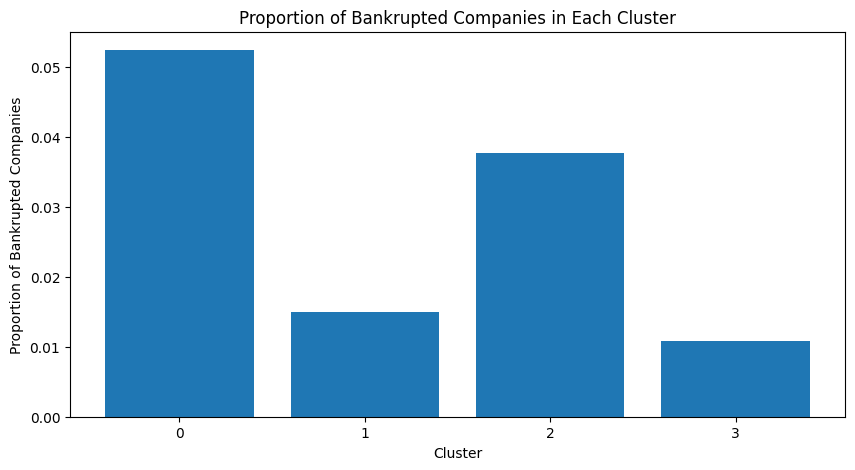

In [60]:
proportions = []
bankrupt_counts = []
total_companies = []
for x in train_data['Cluster'].unique():
    updated_df = train_data[train_data['Cluster'] == x]
    proportion = updated_df['Bankrupt?'].sum()/len(updated_df)
    proportions.append(proportion)
    bankrupt_counts.append(updated_df['Bankrupt?'].sum())
    total_companies.append(len(updated_df))
    print(f"Number of Companies in Cluster {x}: {len(updated_df)}")
    print(f"Number of Bankrupted Companies in Cluster {x}: {updated_df['Bankrupt?'].sum()}")
    print(f"Proportion of Bankrupted Companies in Cluster {x}: {proportion:.2f}")
plt.figure(figsize=(10, 5))
plt.bar(train_data['Cluster'].unique(), proportions)
plt.title('Proportion of Bankrupted Companies in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Bankrupted Companies')
plt.xticks(train_data['Cluster'].unique())
plt.show()



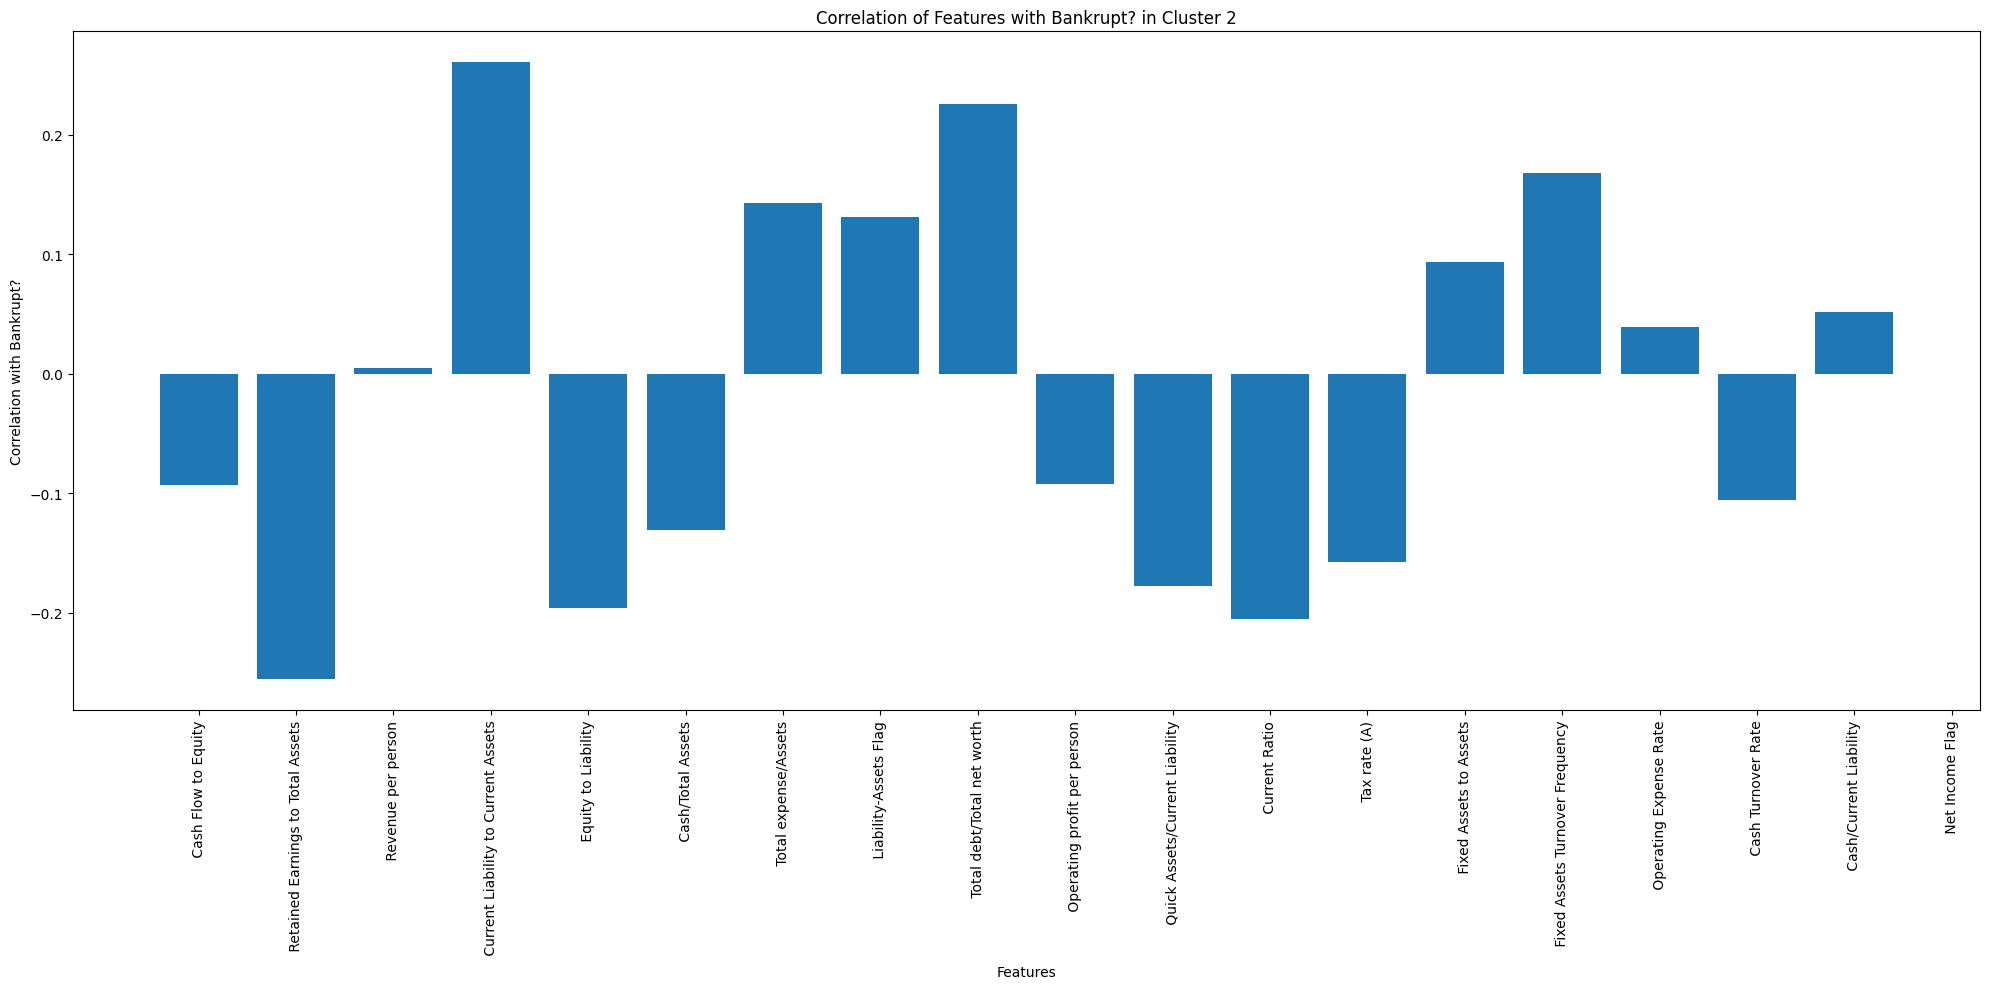

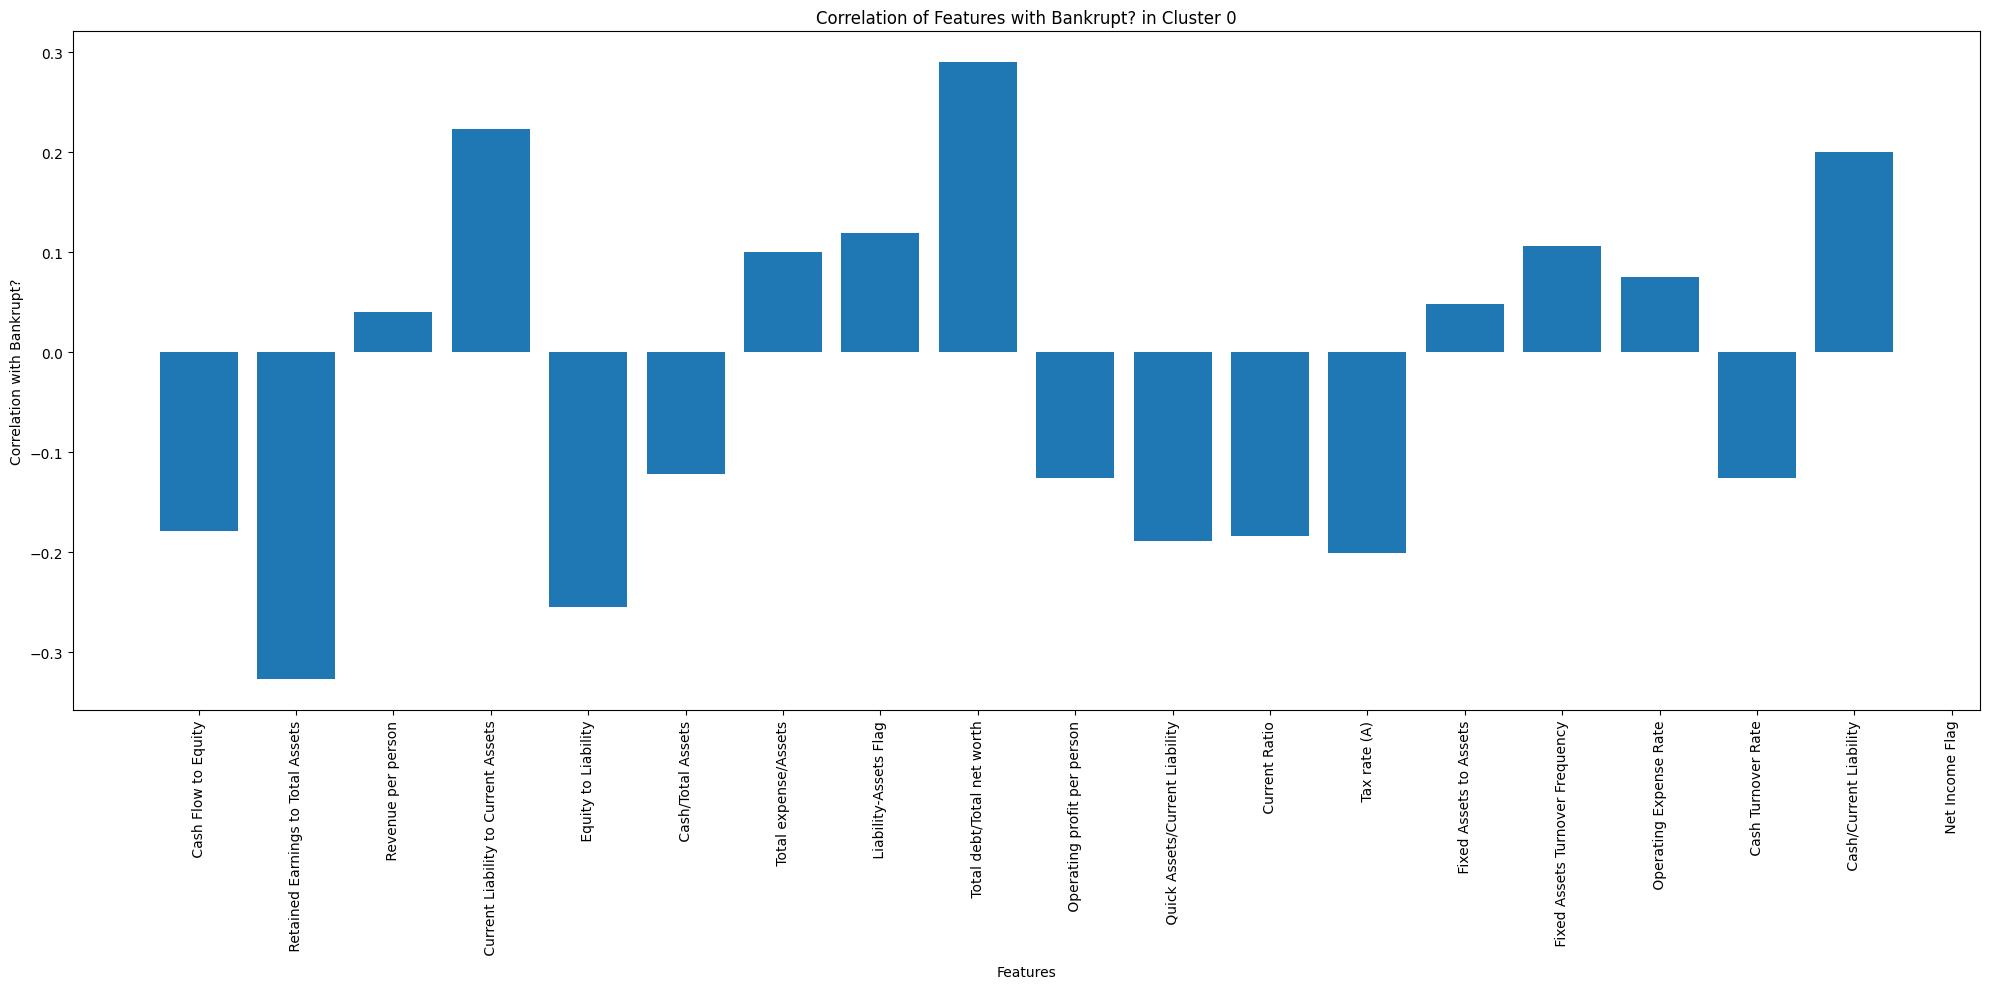

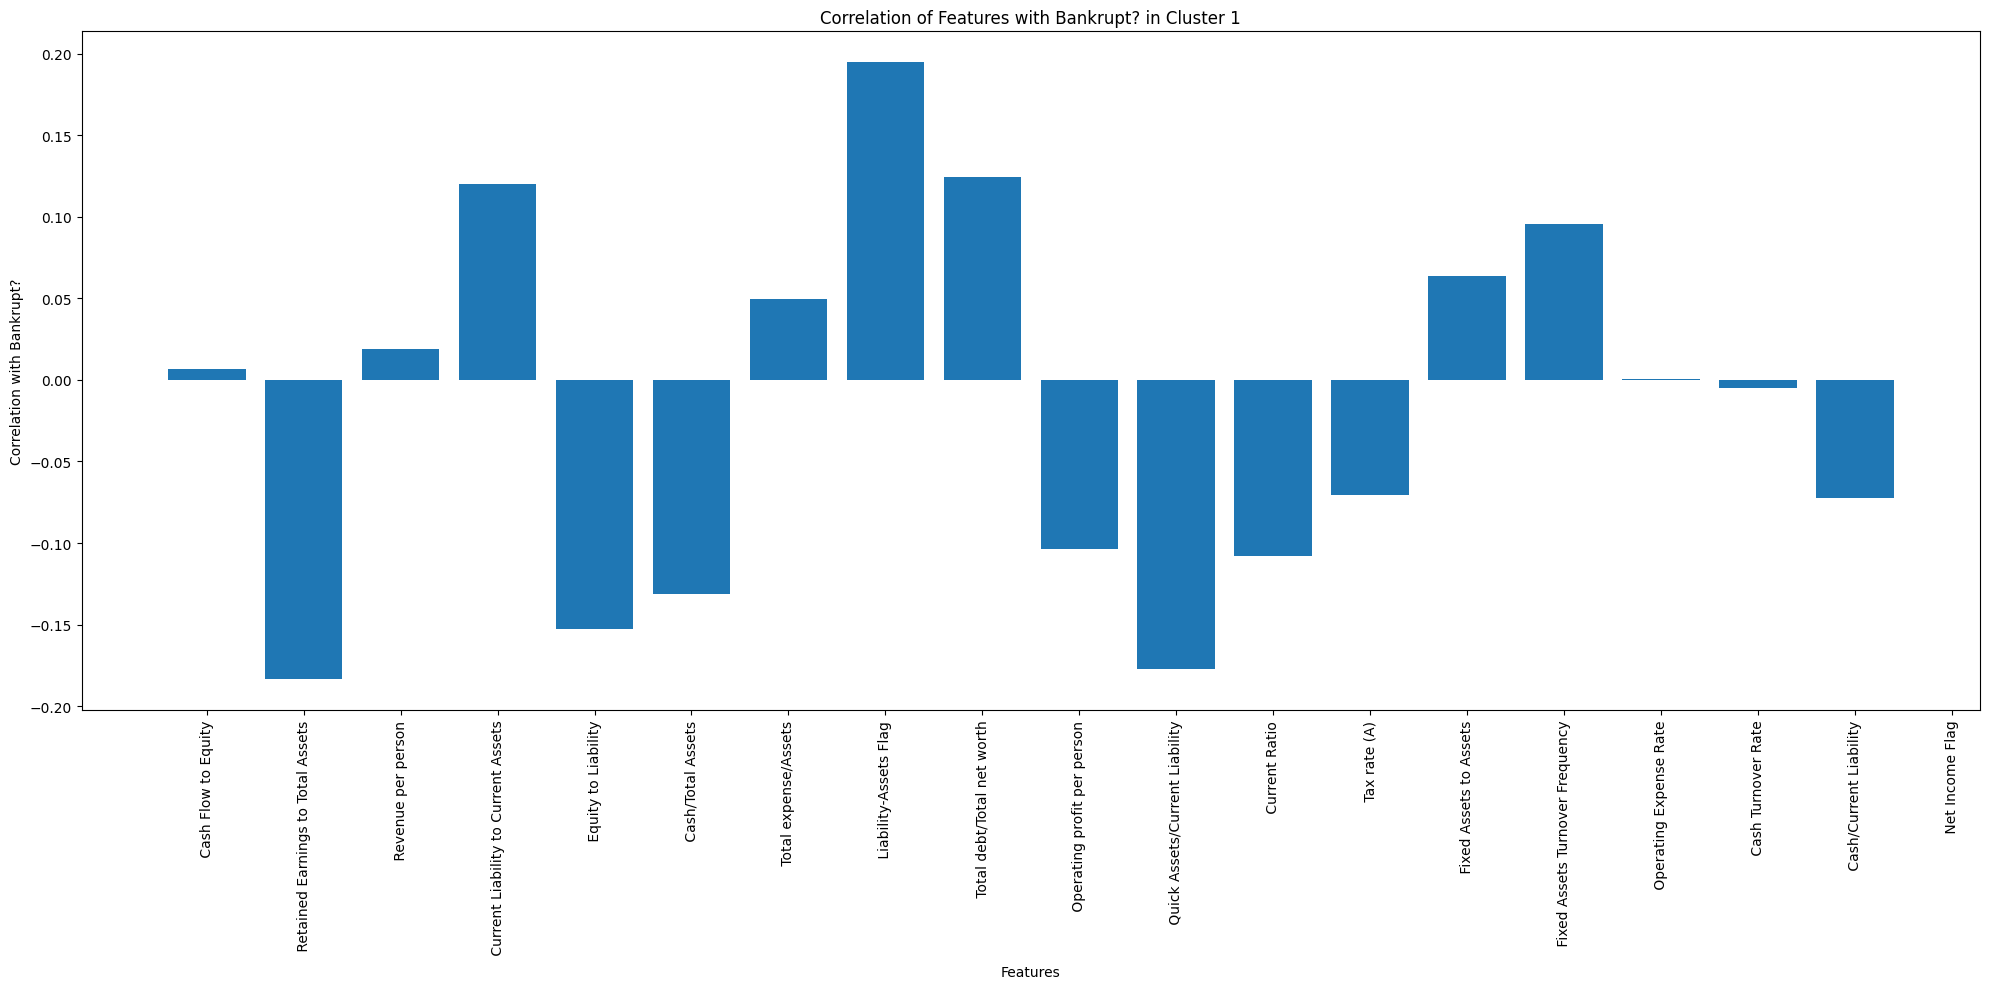

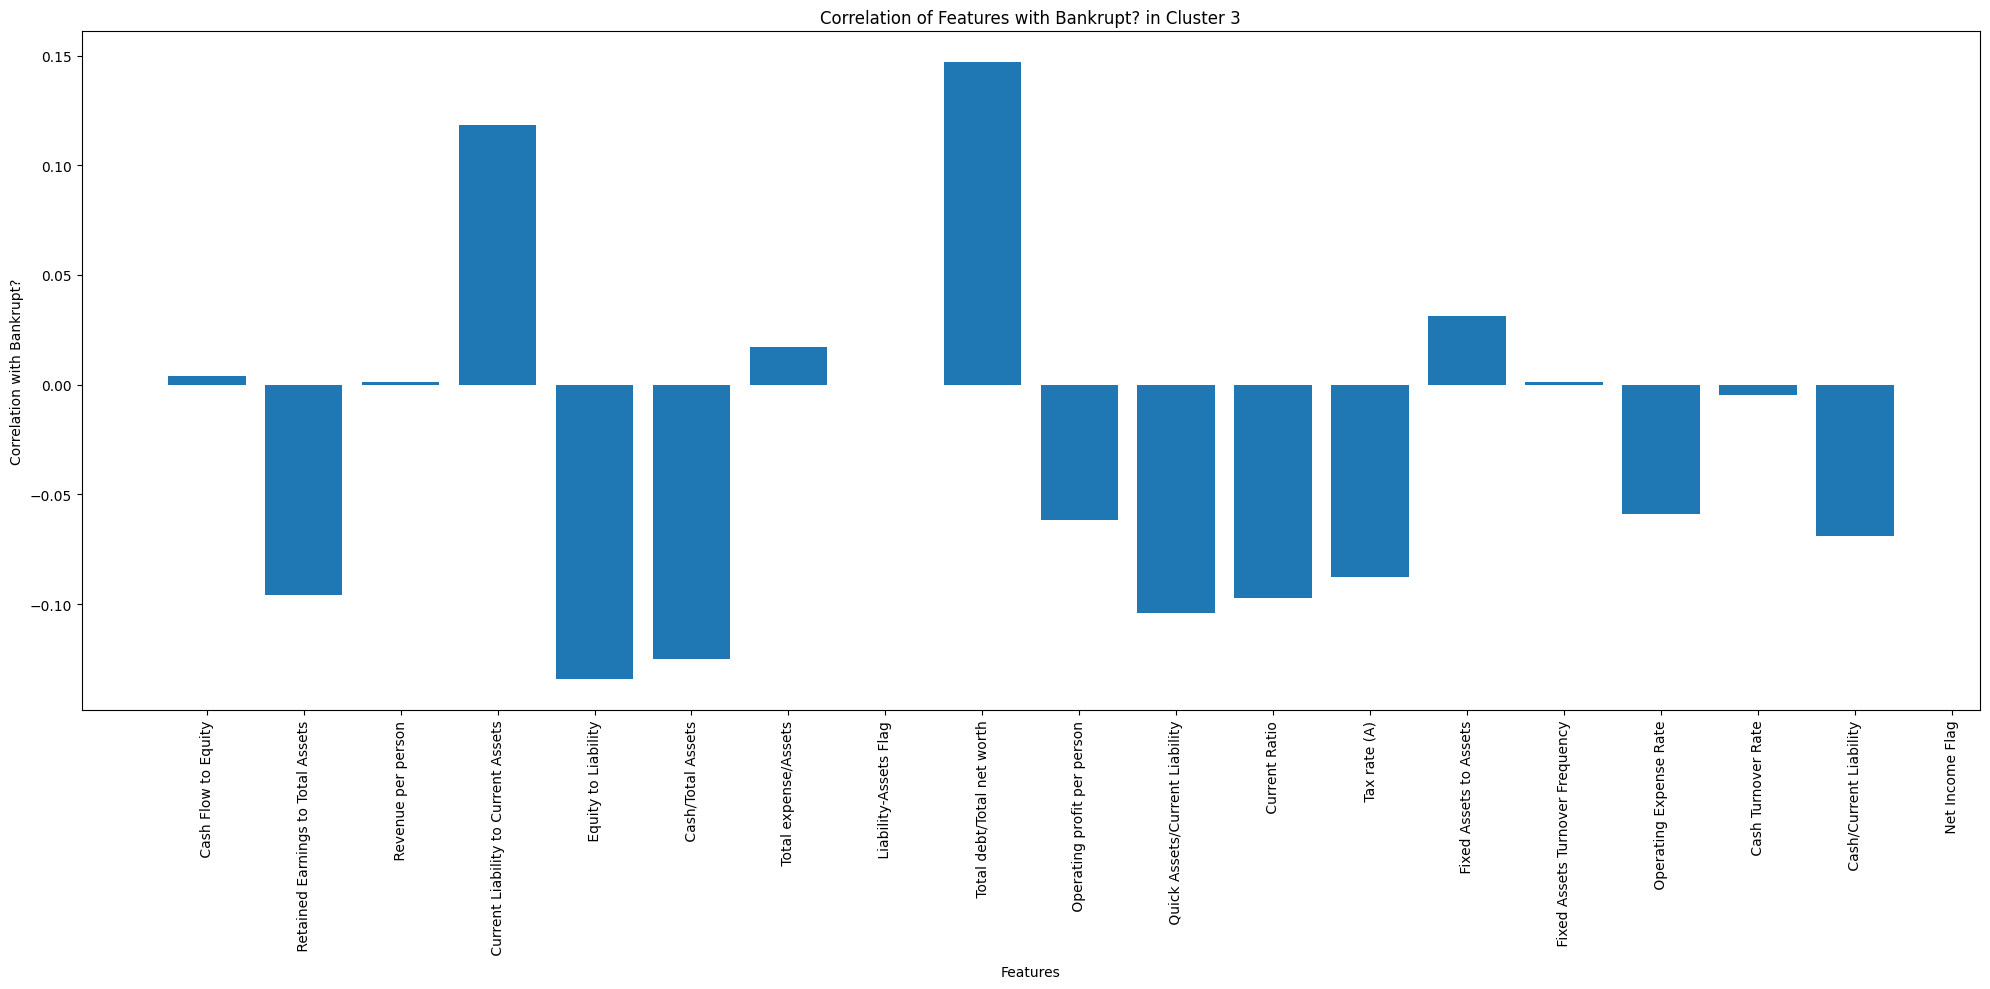

In [61]:
# Let's see in each cluster the correlation of the features with being bankrupt
for x in train_data['Cluster'].unique():
    correlation = train_data[train_data['Cluster'] == x].corr()['Bankrupt?']
    correlation = correlation[correlation.index != 'Bankrupt?'] 
    plt.figure(figsize=(20, 10))
    plt.bar(correlation.index, correlation.values)
    plt.title(f'Correlation of Features with Bankrupt? in Cluster {x}')
    plt.xlabel('Features')
    plt.ylabel('Correlation with Bankrupt?')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()

From this dataset, what we see is that retained earnings to total assets always seems to be negatively correlated with our target. Similarly, that is the same case with Equity to Liability which is also somewhat negatively correlated with the target. On the other hand, we see that the top 3 positively correlated variables are Current Liability to Current Assets, Liability-Assets Flag, and Total debt/ Total Net worth. The one main difference here though is that these correlations are all have mixed rankings upon the top three correlations. It's likely that these correlations will probably be most helpful to us in our testing.

## Final SubGroups
1. Shyam Parikh - Cluster 0
2. Ayan Mahmood - Cluster 1
3. Lijing Li - Cluster 2
4. Ryan Camburn - Cluster 3


In [62]:
train_data.to_csv('../data/train_data_transformed.csv', index=False)

## Cluster-ID Classification Model

In [63]:
#svm model for the classification of clusters
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('../data/train_data_transformed.csv')

#prep features and tables
X = df.drop(columns=['Cluster', 'Bankrupt?'])
y = df['Cluster']
print(X.info())
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train linear SVM classifier
svm_clf = LinearSVC(random_state=42, max_iter=10000)
svm_clf.fit(X_scaled, y)

#evaluate accuracy
train_acc = svm_clf.score(X_scaled, y)
y_pred = svm_clf.predict(X_scaled)

print(f"Training Accuracy: {train_acc:.4f}\n")
print("Classification Report:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0    Cash Flow to Equity                  5807 non-null   float64
 1    Retained Earnings to Total Assets    5807 non-null   float64
 2    Revenue per person                   5807 non-null   float64
 3    Current Liability to Current Assets  5807 non-null   float64
 4    Equity to Liability                  5807 non-null   float64
 5    Cash/Total Assets                    5807 non-null   float64
 6    Total expense/Assets                 5807 non-null   float64
 7    Liability-Assets Flag                5807 non-null   float64
 8    Total debt/Total net worth           5807 non-null   float64
 9    Operating profit per person          5807 non-null   float64
 10   Quick Assets/Current Liability       5807 non-null   float64
 11   Current Ratio   

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [64]:
import joblib
joblib.dump(svm_clf, "../models/cluster_clf.pkl")

['../models/cluster_clf.pkl']

In [65]:
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']